## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [29]:

import pandas as pd
data_hf = pd.read_csv("C:\\Users\\mimig\\OneDrive\\Počítač\\4.rocnik-leto\\spracovanieBioUdajov\\heart+failure+clinical+records\\heart_failure_clinical_records_dataset.csv")
data_hf.head()

#missing_values = data_hf.isna().sum()
#missing_values

# duplicates = data_hf.duplicated().sum()
# duplicates

np.int64(0)

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [13]:

gender_counts = data_hf['sex'].value_counts()
gender_counts

smoking_counts = data_hf.groupby('sex')['smoking'].value_counts()
smoking_counts

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: count, dtype: int64

**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [15]:

min_age = data_hf['age'].min()
max_age = data_hf['age'].max()
mean_age = data_hf['age'].mean()

#min_age, max_age, mean_age

most_common_age = data_hf['age'].mode()[0]
most_common_age

np.float64(60.0)

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

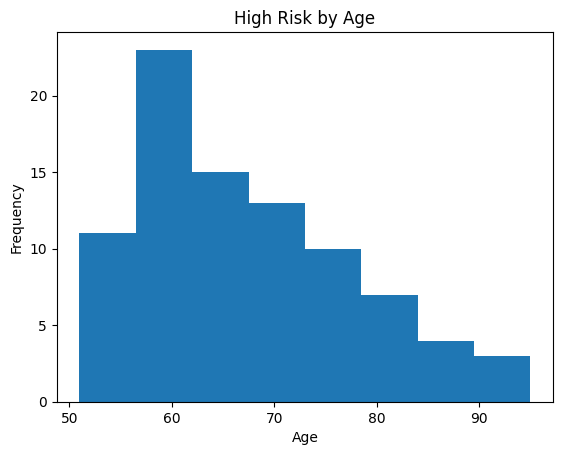

In [17]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

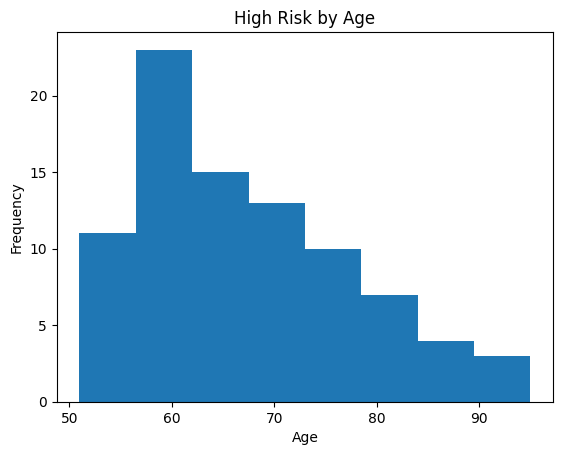

np.int64(18)

In [21]:

high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

most_common_high_risk_age = high_risk['age'].mode()[0]
#most_common_high_risk_age

high_risk_count = high_risk['age'].value_counts()[most_common_high_risk_age]
high_risk_count

**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


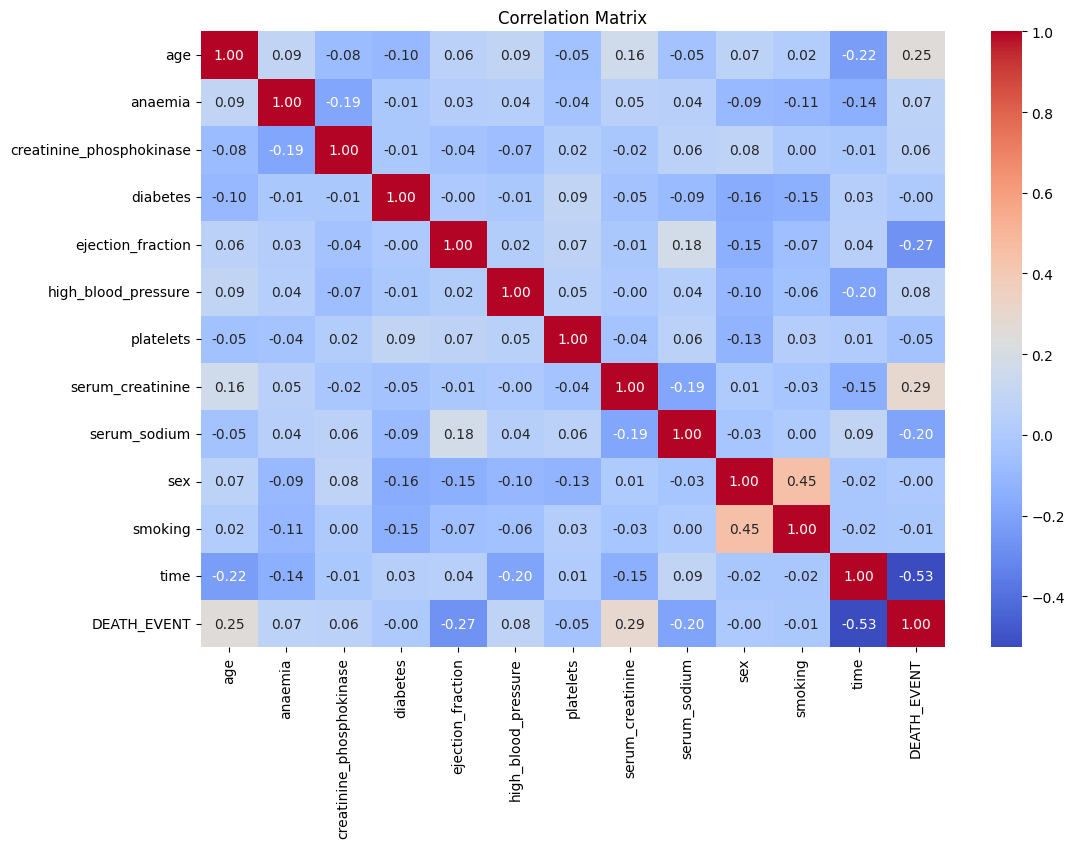

Najväčšia záporná korelácia:
 DEATH_EVENT  time                -0.526964
             ejection_fraction   -0.268603
dtype: float64


In [31]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_data = data_hf.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#negative_corr = correlation_matrix.unstack().sort_values()[0:4]
#negative_corr

# correlation_pairs = correlation_matrix.where(~correlation_matrix.mask(np.tril(np.ones(correlation_matrix.shape), k=0).astype(bool)).isna())
#
# negative_corr = correlation_pairs.unstack().sort_values()[0:2]
# print("Najväčšia záporná korelácia:\n", negative_corr)

# correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
#
# correlation_pairs = correlation_matrix_no_diag.unstack()
#
# positive_corr = correlation_pairs.sort_values(ascending=False).dropna().head(1)
# print("Najväčšia kladná korelácia:\n", positive_corr)

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure